In [ ]:
!git clone https://github.com/betharaghu/text_mercato_assginment.git

Cloning into 'text_mercato_assginment'...
remote: Enumerating objects: 524, done.
remote: Total 524 (delta 0), reused 0 (delta 0), pack-reused 524
Receiving objects: 100% (524/524), 112.31 MiB | 43.84 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
%cd text_mercato_assginment/

/content/text_mercato_assginment


In [ ]:
## Import all important libraries
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Input, \
                                    LSTM, Embedding, Input, TimeDistributed, Bidirectional, Activation, RepeatVector, Concatenate
from keras.preprocessing.sequence import pad_sequences


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os

In [ ]:
## Read the file
df = pd.read_excel('dataset_1.xlsx')
df.head()

,Title,Description,Material,Pattern,Neckline,Image_Path
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg


In [ ]:
df.shape

(500, 6)

In [ ]:
## Store the image path and description in list 
Img_path = list(df['Image_Path'])
Img_Description = list(df["Description"])

In [ ]:
imagePath = []
for i in Img_path:
  ip = "." + i
  imagePath.append(ip)

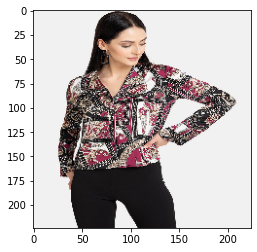

In [ ]:
img = cv2.imread('./images/pic_200.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
plt.imshow(img)

In [ ]:
ResNet = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
## Apply ResNet model on all images selecting the 2nd from last layer
last = ResNet.layers[-2].output
modell = Model(inputs = ResNet.input,outputs = last)
modell.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
## Lets predict using ResNet model and add it in a dictionary
images_features = {}
count = 0
for i in imagePath:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modell.predict(img).reshape(2048,)    
    images_features[i] = pred

In [ ]:
#Create a dictionary of image path to description
dataa = {}
for i, j in zip(imagePath, Img_Description):
  dataa[i] = j

In [ ]:

## Preprocess the description
def preprocessed(txt):
    modified = txt.lower()
    ## Add start and end element in description
    modified = 'seqstart ' + modified + ' seqend'   
    return modified


In [ ]:
## Apply the preprocessing on our dict
for k,v in dataa.items():
      dataa[k] = preprocessed(v)


In [ ]:

## After preprocessing
dataa['./images/pic_100.jpg']

'seqstart this navy blue solid top from payal pratap will be a great addition to your western wear collection. featuring a boat neck and 3/4th sleeves, pair this top with jeggings, minimal accessories and casual footwear to create that go-to look. seqend'